### Poisson PDE 
$$
 \def\arraystretch{1.5}
      \left \{ \begin{array}{ccccc}
        \dfrac{\partial^2 u}{\partial x^2} + \dfrac{\partial^2 u}{\partial y^2} &=& \dfrac{x}{y} + \dfrac{y}{x},& x,y \in (1,2);\\
        u(x,1)  = x \ln{x},   && u(x,2) = x \ln{4x^2} & x \in [1,2],\\
        u(1,y)  = y \ln{y},   && u(2,y) = y \ln{4y^2} & y \in [1,2], 
 
    \end{array}\right.$$
  $$u(x,y) = xy \ln{xy} 
  $$

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# the model
class FCN(nn.Module):
    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS):
        super().__init__()
        activation = nn.Tanh
        self.fcs = nn.Sequential(*[
            nn.Linear(N_INPUT, N_HIDDEN),
            activation()

        ])


        self.fch =nn.Sequential(*[ nn.Sequential(*[
            nn.Linear(N_HIDDEN, N_HIDDEN),
            activation()

        ]) for _ in range(N_LAYERS-1)])
        self.fce = nn.Linear(N_HIDDEN,N_OUTPUT)
        def weights_initialization(self):
                """"
                When we define all the modules such as the layers in '__init__()'
                method above, these are all stored in 'self.modules()'.
                We go through each module one by one. This is the entire network,
                basically.
                """
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight,gain=1.0)
                nn.init.constant_(m.bias, 0)
    def forward(self, x,t):
        inputs = torch.cat([x,t],axis=1) # combined two arrays of 1 columns each to one array of 2 columns
        inputs = self.fcs(inputs)
        inputs = self.fch(inputs)
        inputs = self.fce(inputs)
        return inputs

In [3]:
def exact_solution(x,y):
    return x*y * torch.log(x*y)

In [4]:
## PDE as loss function. Thus would use the network which we call as u_theta
def f(x,y, net):
    u = net(x,y) # the dependent variable u is given by the network based on independent variables x,t
    ## Based on our f = du/dx - 2du/dt - u, we need du/dx and du/dt
    u_x = torch.autograd.grad(u, x,torch.ones_like(u), create_graph=True)[0]
    u_xx = torch.autograd.grad(u_x, x, torch.ones_like(u_x),create_graph=True)[0]
    u_y = torch.autograd.grad(u, y,torch.ones_like(u), create_graph=True)[0]
    u_yy = torch.autograd.grad(u_y, y,torch.ones_like(u_y), create_graph=True)[0]
    pde = u_yy + u_xx - (x/y) - (y/x)
    return pde

In [5]:
nx = 30
ny = 30
nx_test = 300
ny_test = 300
x_physics = torch.linspace(1,2,nx, requires_grad = True)
y_physics = torch.linspace(1,2,ny, requires_grad = True)
"""x_boundary1 = y_physics * torch.log(y_physics)
x_boundary2 = y_physics * torch.log(4* y_physics**2)
y_boundary1 = x_physics * torch.log(x_physics)
y_boundary2 = x_physics * torch.log(4* x_physics**2)"""
x_boundary1 = torch.ones((nx**2,1))
x_boundary2 = torch.ones((nx**2,1)) + 1
y_boundary1 = torch.ones((ny**2,1))
y_boundary2 = torch.ones((ny**2,1)) + 1

x_test = torch.linspace(1,2,nx_test)

y_test = torch.linspace(1,2,ny_test)
x_grid_physics, y_grid_physics = torch.meshgrid(x_physics,y_physics)
x_grid_physics, y_grid_physics = x_grid_physics.reshape(-1,1), y_grid_physics.reshape(-1,1)

x_grid_test, y_grid_test = torch.meshgrid(x_test,y_test)
x_grid_test, y_grid_test = x_grid_test.reshape(-1,1), y_grid_test.reshape(-1,1)
u_exact = exact_solution(x_test.view(-1,1),y_test)

d:\anaconda\envs\MX_project\Lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [6]:
u_exact.shape

torch.Size([300, 300])

Text(0.5, 1.0, 'Exact solution')

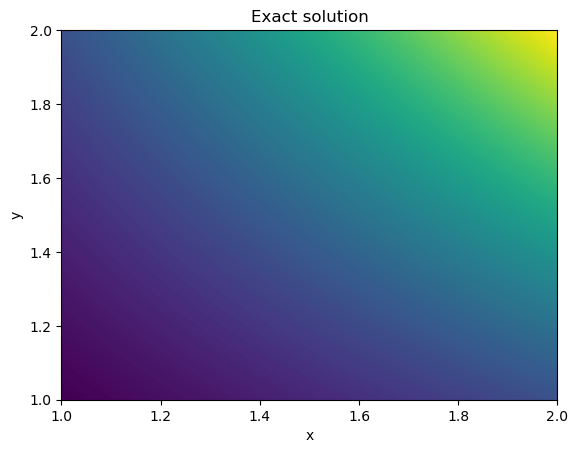

In [7]:
plt.imshow(u_exact.T, aspect='auto', extent=[x_test[0], x_test[-1],y_test[0], y_test[-1]], origin='lower')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Exact solution")

physics loss is :  14.667607307434082
Boundary loss is: 15.489853858947754
initial value loss is: 0.8395797610282898
total loss is: 35.05873489379883
MSE loss is  4.716588497161865


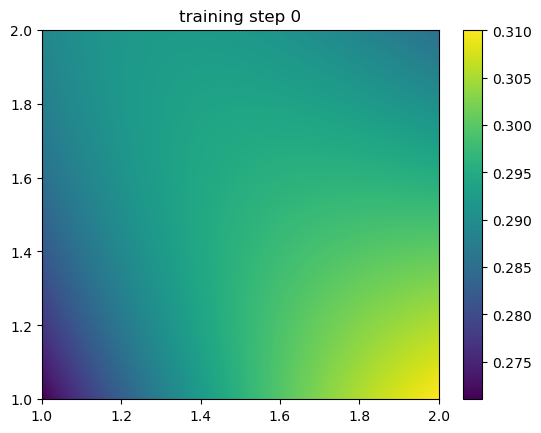

Global error is: 5.2596235275268555
physics loss is :  0.0009737564250826836
Boundary loss is: 0.0016349450452253222
initial value loss is: 0.0007426983211189508
total loss is: 0.005753731355071068
MSE loss is  2.0124526023864746


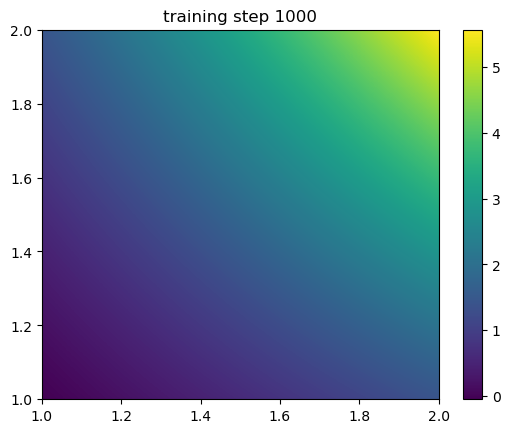

Global error is: 0.05031907558441162
physics loss is :  0.00015928996435832232
Boundary loss is: 0.0002903568674810231
initial value loss is: 0.00017630401998758316
total loss is: 0.0012901097070425749
MSE loss is  2.0645267963409424


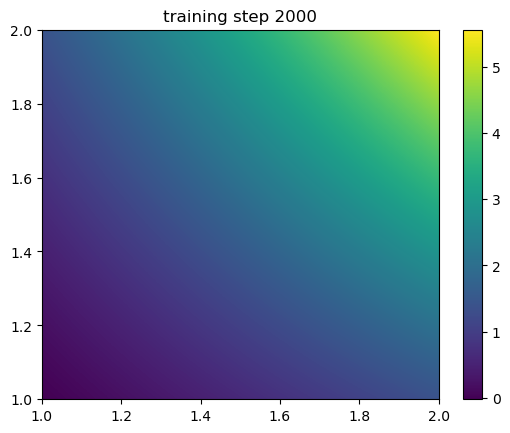

Global error is: 0.022069616243243217
physics loss is :  0.00017845979891717434
Boundary loss is: 0.0004266794421710074
initial value loss is: 0.0003065163327846676
total loss is: 0.0014202399179339409
MSE loss is  2.1086361408233643


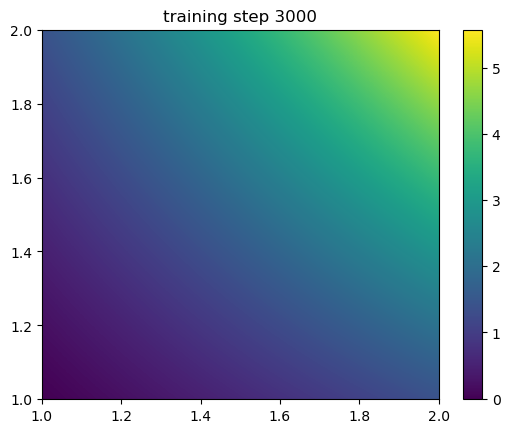

Global error is: 0.031281471252441406
physics loss is :  1.6620497262920253e-05
Boundary loss is: 5.431918543763459e-05
initial value loss is: 4.168922532699071e-05
total loss is: 0.0002872605109587312
MSE loss is  2.080259084701538


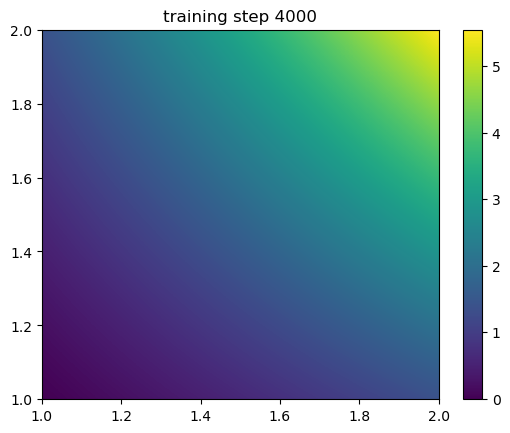

Global error is: 0.009017148986458778
physics loss is :  3.829413344647037e-06
Boundary loss is: 1.2190916095278226e-05
initial value loss is: 1.1262837688263971e-05
total loss is: 0.00014452202594839036
MSE loss is  2.0742385387420654


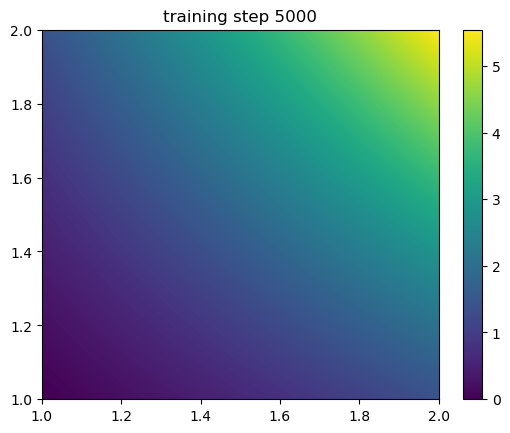

Global error is: 0.004966020584106445


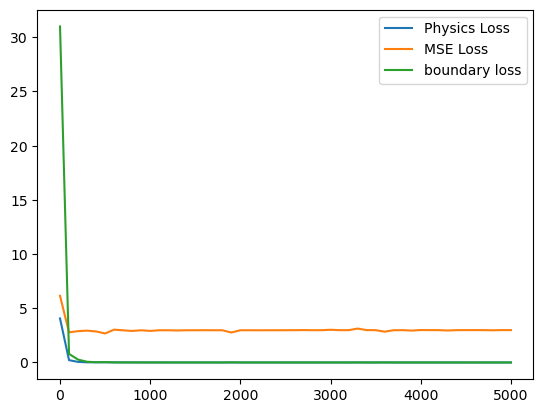

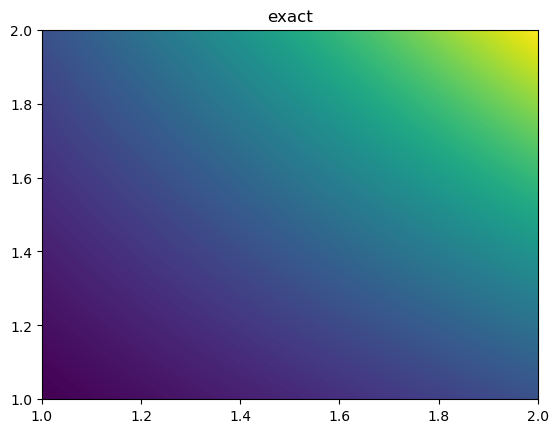

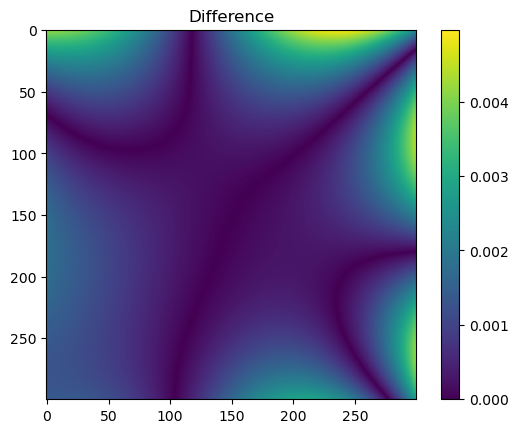

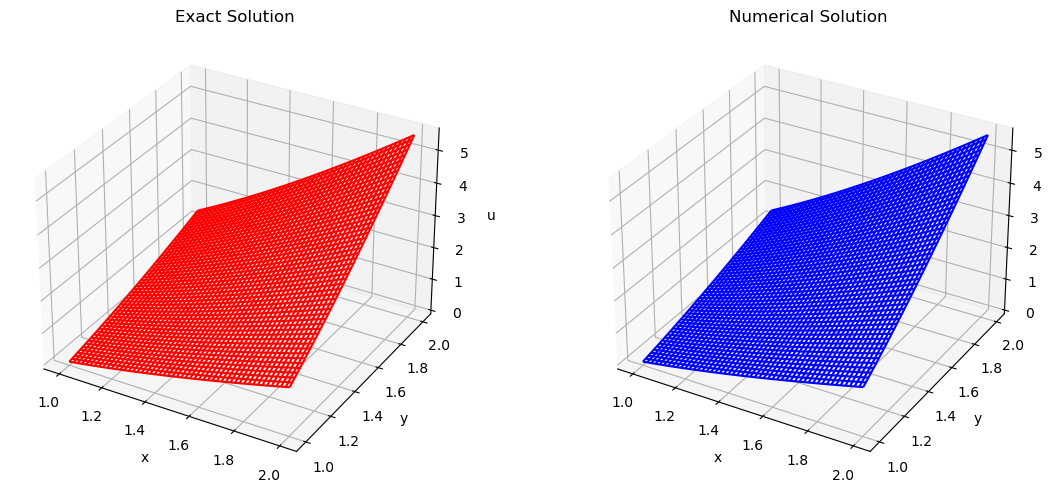

In [13]:
#torch.manual_seed(123)
pinn = FCN(2,1,64,5)



mse_cost_function = torch.nn.MSELoss() # Mean squared error
optimizer = torch.optim.Adam(pinn.parameters(), lr = 1e-3)
physics_loss = []
MSE_loss = []
iteration = []
boundary_loss = []
for i in range(5001):
    optimizer.zero_grad()
    lambda1, lambda2 = 1e-1, 1e-4

    # Boundary loss
    u = pinn(x_boundary1,y_grid_physics)

    loss1 = mse_cost_function(u, y_grid_physics * torch.log(y_grid_physics))
    u = pinn(x_boundary2,y_grid_physics)

    loss2 = mse_cost_function(u, y_grid_physics * torch.log(4*y_grid_physics**2))
   # initial loss

    u = pinn(x_grid_physics,y_boundary1)

    loss3 = mse_cost_function(u,  x_grid_physics * torch.log(x_grid_physics) )
    
       # initial loss

    u = pinn(x_grid_physics,y_boundary2)

    loss4 = mse_cost_function(u,  x_grid_physics * torch.log(4*x_grid_physics**2) )
    #PDE loss

    #u = pinn(x_grid_physics,t_physics)
    #dudx = torch.autograd.grad(u,x_grid_physics , torch.ones_like(u), create_graph = True)[0]
    #dudxx = torch.autograd.grad(dudx,x_grid_physics , torch.ones_like(dudx), create_graph = True)[0]
    #dudt = torch.autograd.grad( u,   t_physics , torch.ones_like(u),    create_graph = True)[0]

    pde_loss = f(x_grid_physics,y_grid_physics,pinn)

    loss5 = mse_cost_function(pde_loss, torch.zeros_like(pde_loss))

    loss = loss1 +  loss2 + loss3 + loss4 + loss5
    u_physics = exact_solution(x_grid_physics, y_grid_physics)
    #points_loss = nn.MSELoss()
    #loss = points_loss(u_physics, u)
    loss.backward()
    optimizer.step()
    if i % 100 == 0: 
        boundary_loss.append(loss1.detach() + loss2.detach()+ loss3.detach() + loss4.detach())
        physics_loss.append(loss5.detach())
        MSE_loss.append(torch.mean(((u- u_physics)**2)).detach())
        iteration.append(i)
    if i % 1000 == 0:
        print(f"physics loss is :  {loss4}")
        print(f"Boundary loss is: {loss1+loss2}")
        print(f"initial value loss is: {loss3}")
        print(f"total loss is: {loss}")
        print(f"MSE loss is  {torch.mean(u- u_physics)**2}")
        u = pinn(x_grid_test,y_grid_test).detach()
        #plt.figure(figsize = (6,2,5))
        #plt.scatter(x_grid_physics.detach()[:,0],
                    #torch.zeros_like(x_grid_physics)[:,0],s=20,lw=0, color = "tab:green", alpha=0.6)
        #plt.scatter(t_initial.detach()[:,0],
                    #torch.zeros_like(t_initial)[:,0],s=20,lw=0, color = "tab:green", alpha=0.6)
        #plt.plot(t_test[:,0], u_exact[:,0],label = "Exact",color = "tab:grey")
        #plt.plot(t_test[:,0], u[:,0], label = "PINN Solution (test)", color = "tab:green")
        #plt.plot(t_physics.detach()[:,0], u.detach()[:,0], label = "PINN Solution (train)", color = "tab:blue")
        plt.imshow(u.reshape(nx_test,ny_test).T, aspect="auto", extent=[1, 2, 1, 2],origin='lower')
        plt.title(f"training step {i}")
        plt.colorbar()
        #plt.legend()
        plt.show()
        global_error = torch.max(abs(u.reshape(nx_test,ny_test).T - u_exact) )
        print(f"Global error is: {global_error}")

plt.plot(iteration,physics_loss, label = "Physics Loss")
plt.plot(iteration, MSE_loss, label = "MSE Loss")
plt.plot(iteration, boundary_loss, label = "boundary loss")
plt.legend()
plt.show()
plt.imshow(u_exact, aspect="auto", extent=[1, 2, 1, 2],origin='lower')
plt.title("exact")

plt.show()

plt.imshow(abs(u.reshape(nx_test,ny_test).T-u_exact))
plt.title("Difference")
plt.colorbar()
plt.show()




fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), subplot_kw={'projection': '3d'})


X, Y = x_grid_test.view(300,300), y_grid_test.view(300,300)
# Plot the first subplot (left)
ax1.plot_wireframe(X, Y, u_exact, color='r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('u')
ax1.set_title('Exact Solution')

# Plot the second subplot (right)
ax2.plot_wireframe(X, Y, u.reshape(300,300), color='b')  # Modify the data or style as needed
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('u')
ax2.set_title('Numerical Solution')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [44]:
X.shape

torch.Size([90000, 1])

In [52]:
torch.meshgrid(x_physics.reshape(-1), y_physics.reshape(-1))[1].shape

torch.Size([20, 20])